# Latar Belakang

Ada banyak faktor yang dapat mempengaruhi kelangsungan hidup suatu bisnis mulai dari daya saing hingga reputasi dan kepuasan pelanggan. Kepuasan pelanggan sangat penting karena dapat mempengaruhi apakah pelanggan cenderung akan menggunakan kembali layanan tersebut dan apakah mereka mungkin merekomendasikan layanan tersebut atau sebaliknya

Namun, kepuasan itu sendiri bersifat subjektif dan dapat dipengaruhi oleh berbagai macam faktor. Termasuk kepekaan pelanggan terhadap kualitas aspek tertentu dari suatu layanan atau apakah penumpang sedang mengalami hari yang buruk atau mungkin cuaca yang sedang tidak baik terjadi di sekitarnya. Dengan memahami kepuasan pelanggan, bisnis dapat berusaha untuk meningkatkan dan memastikan pertumbuhan bisnisnya di masa depan

Dataset ini berisi survei kepuasan penumpang maskapai penerbangan. Faktor-faktor apa saja yang sangat berkorelasi dengan penumpang yang puas (atau tidak puas)

# Pernyataan Masalah

Dataset ini berisikan survei kepuasan pelanggan terhadap pelayanan maskapai penerbangan, dari hasil survei ini bisa dianalisis:
- faktor-faktor apa saja yang dapat mempengaruhi kepuasan pelanggan terhadap pelayanan yang diberikan dari suatu maskapai penerbangan.
- layanan apa saja yang perlu dipertahankan dan ditngkatkan kualitasnya supaya pelanggan bisa tetap puas terhadap layanan yang diberikan


## Dataset

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [256]:
df = pd.read_csv('airline_passanger_satisfaction.csv')

Melihat 10 data teratas dan seluruh kolom beserta isinya yang ada di dalam dataset

In [257]:

pd.set_option('display.max_columns', None)

In [258]:
df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [53]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Didalam dataset berisikan informasi hasil survei kepuasan pelanggan terhadap pelayanan maskapai penerbangan, ada 25 kolom yang terdapat pada dataset ini, yaitu:
- Unnamed: 0 : 
- id: ID unik untuksetiap pelanggan maskapai penerbangan
- Gender: Jenis kelamin dari setiap pelanggan
- Customer Type: Jenis setiap pelanggan yang dikategorikan menjadi 2 yaitu pelanggan tetap dan pelanggan tidak tetap
- Age: Umur setiap Pelanggan
- Type of Travel: jenis penerbangan yang diambil pelanggan
- Class: Kelas penerbangan yang diambil pelanggan
- Filght Distance: Jarak tempuh Penerbangan
- Inflight wifi Service: layanan wifi saat penerbangan
- Departure/Arrival time comvenient: Kenyamanan waktu saat berangkat atau tiba
- Ease of Online booking: kemudahan dalam melakukan pemesanan online
- Gate location: Lokasi gerbang menuju pesawat
- Food and drink: Makanan dan minuman yang disediakan selama penerbangan
- Online boarding: daftar ulang penerbangan online
- Seat comfort: Kenyamanan Kursi pesawat
- Inflight entertainment: Hiburan yang ada di dalam pesawat
- On-board service: pelayanan saat di dalam pesawat
- Leg room service: pelayanan ruang kaki yang tersedia di kursi penumpang
- Baggage handling: Penanganan bagasi penumpang
- Checkin service: layanan check -in
- Inflight service: Pelayanan saat penerbangan
- Cleanliness: Kebersihan 
- Departure Delay in Minutes: penundaan keberangkatan (menit)
- Arrival Delay in Minutes: penundaan kedatangan (menit)
- satisfaction: Kepuasan pelanggan (puas dan netral atau tidak puas)


## Data Understanding dan Cleaning

sebelum dataset dianalisis, dataset perlu untuk dilihat informasi yang terdapat didalamnya lalu dibersihkan sehingga dapat mempermudah analisa data

Deskripsi statistik dari dataset

In [54]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [55]:
print(df.shape)
df.info()

(103904, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location             

dataset memiliki 103904 baris dan 25 kolom

### Anomali Data

#### Missing Value

In [56]:
# cek persentase Missing Value di setiap kolom 
df.isna().sum()/df.shape[0]*100

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

<AxesSubplot:>

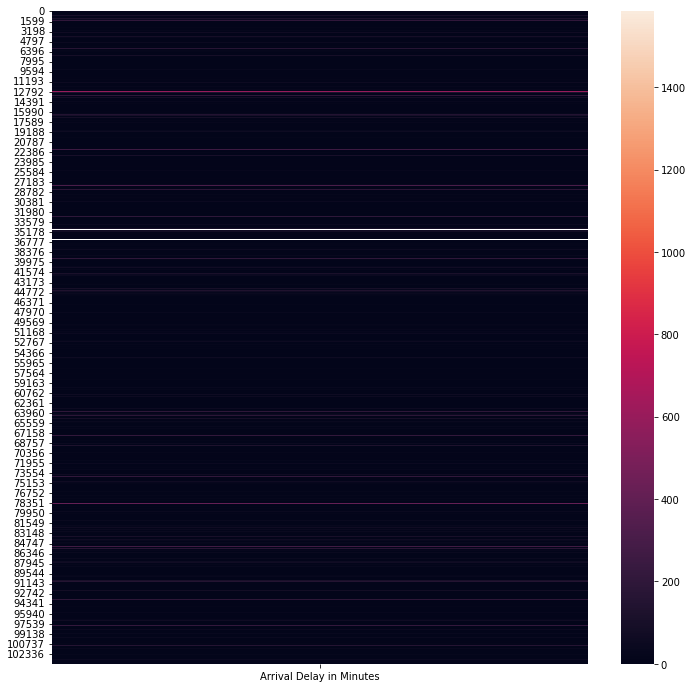

In [57]:
# heatmap Missing Value pada Dataset
plt.figure(figsize=(12,12))
sns.heatmap(df[['Arrival Delay in Minutes']])

In [58]:
df[['Arrival Delay in Minutes']].isna().sum()

Arrival Delay in Minutes    310
dtype: int64

Hasil pengecekan *missing value*:
- Hanya terdapat 1 kolom saja yang memiliki *missing value* yaitu kolom  `Arrival Delay in Minutes` dengan persentase sebesar 0.29% atau 310 dari 103904 data

walaupun persentase nya kecil tetapi saya memutuskan untuk menangani *missing value* ini dengan mengisikan *mean*

In [61]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)

In [62]:
df[['Arrival Delay in Minutes']].isna().sum()

Arrival Delay in Minutes    0
dtype: int64

#### Duplicate

In [63]:
# cek data Duplicate
df.duplicated().sum()

0

Hasil pengecekan data *Duplicate*:
- tidak ada data dumpilcate pada dataset ini

#### Data Outliers

- Pengecekan data outliers ini dilakukan hanya kepada kolom-kolom yang memiliki nilai kontinu

<AxesSubplot:xlabel='Age'>

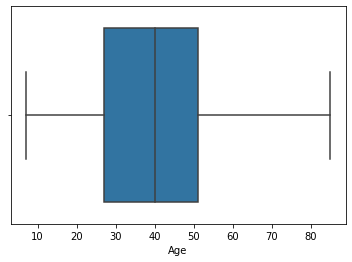

In [162]:
sns.boxplot(df['Age'])


<AxesSubplot:xlabel='Inflight wifi service'>

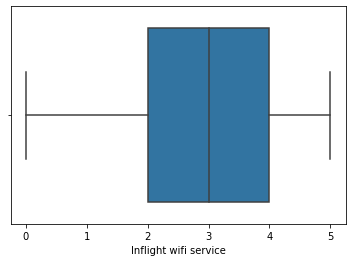

In [69]:

sns.boxplot(df['Inflight wifi service'])

<AxesSubplot:xlabel='Gate location'>

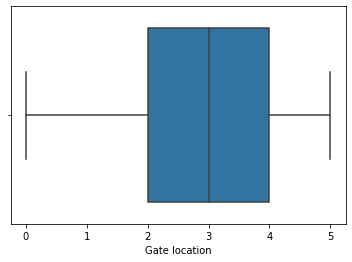

In [70]:
sns.boxplot(df['Gate location'])

<AxesSubplot:xlabel='Departure/Arrival time convenient'>

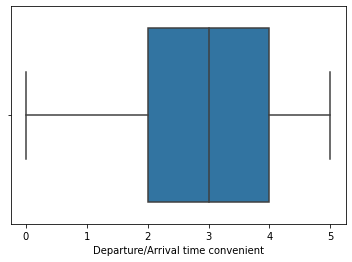

In [71]:
sns.boxplot(df['Departure/Arrival time convenient'])

<AxesSubplot:xlabel='Ease of Online booking'>

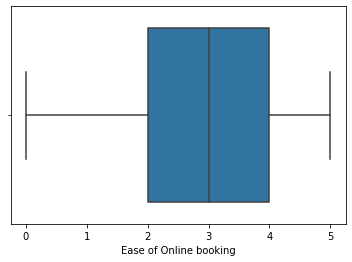

In [72]:
sns.boxplot(df['Ease of Online booking'])

<AxesSubplot:xlabel='Gate location'>

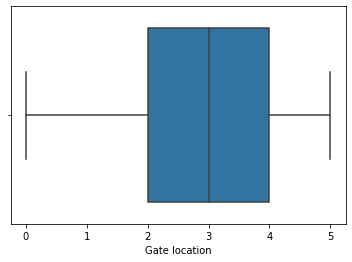

In [73]:
sns.boxplot(df['Gate location'])

<AxesSubplot:xlabel='Food and drink'>

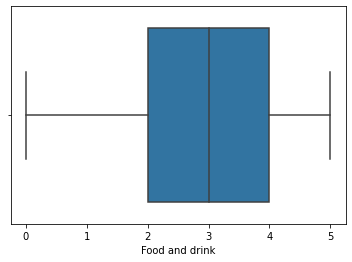

In [74]:
sns.boxplot(df['Food and drink'])

<AxesSubplot:xlabel='Online boarding'>

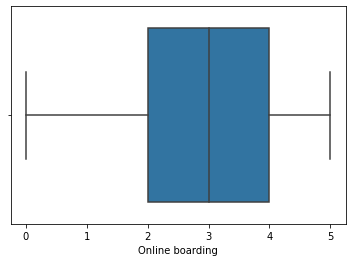

In [75]:
sns.boxplot(df['Online boarding'])

<AxesSubplot:xlabel='Seat comfort'>

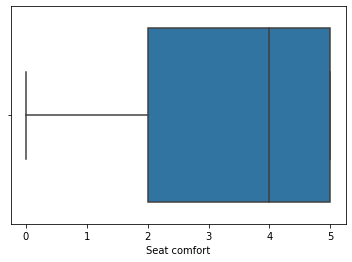

In [76]:
sns.boxplot(df['Seat comfort'])

<AxesSubplot:xlabel='Inflight entertainment'>

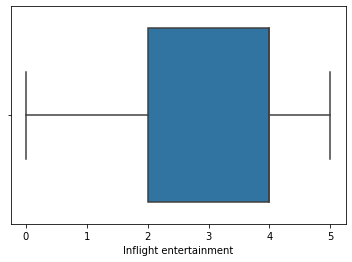

In [77]:
sns.boxplot(df['Inflight entertainment'])

<AxesSubplot:xlabel='On-board service'>

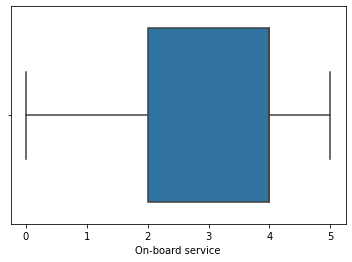

In [78]:
sns.boxplot(df['On-board service'])

<AxesSubplot:xlabel='Leg room service'>

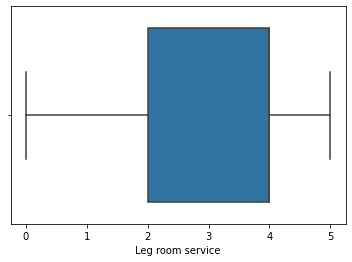

In [79]:
sns.boxplot(df['Leg room service'])

<AxesSubplot:xlabel='Baggage handling'>

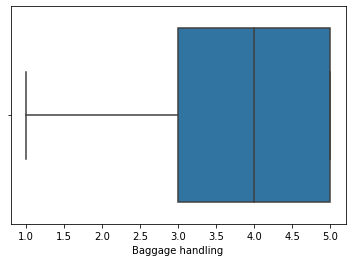

In [80]:
sns.boxplot(df['Baggage handling'])

<AxesSubplot:xlabel='Checkin service'>

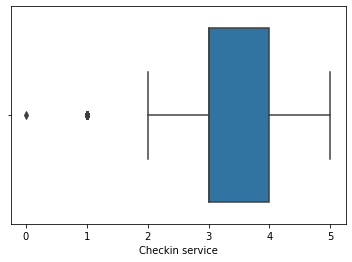

In [81]:
sns.boxplot(df['Checkin service'])

<AxesSubplot:xlabel='Inflight service'>

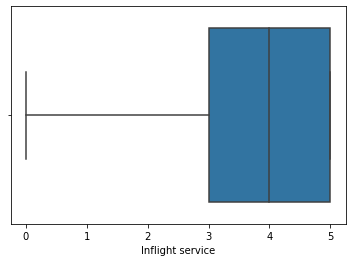

In [82]:
sns.boxplot(df['Inflight service'])

<AxesSubplot:xlabel='Cleanliness'>

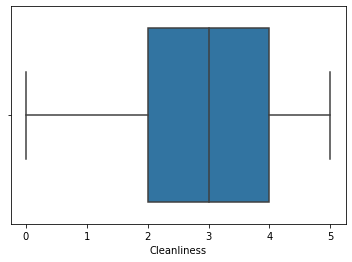

In [83]:
sns.boxplot(df['Cleanliness'])

<AxesSubplot:xlabel='Seat comfort'>

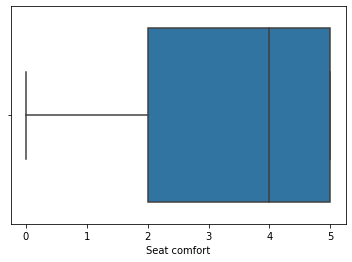

In [84]:
sns.boxplot(df['Seat comfort'])

<AxesSubplot:xlabel='Departure Delay in Minutes'>

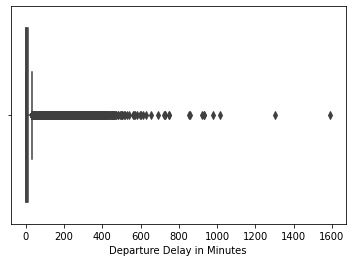

In [259]:
sns.boxplot(df['Departure Delay in Minutes'])

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

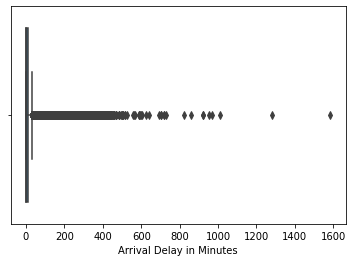

In [260]:
sns.boxplot(df['Arrival Delay in Minutes'])

Hasil pengecekan data outliers:
- Kolom `Departure Delay in Minutes dan Arrival Delay in Minutes` tidak saya anggap outliers karena penundaan yang panjang memang mungkin pernah terjadi pada maskapai tersebut. Penundaan (Delay) bisa terjadi karena faktor cuaca atau terjadi musibah
- terdapat data outliers pada kolom`Checkin service`

untuk mengatasi data outliers ini saya memutuskan untuk menggunakan IQR

In [261]:
q1 = (df['Checkin service']).quantile(0.25)
q3 = (df['Checkin service']).quantile(0.75)
IQR = q3 -q1
maximum = q3 + (1.5*IQR)
print('Nilai Maximum dari kolom Chekin Service: ',maximum)
minimum = q1 - (1.5*IQR)
print('Nilai Minimum dari kolom Checkin Service: ',minimum)
more_than = (df['Checkin service'] > maximum)
lower_than = (df['Checkin service'] < minimum)
df['Checkin service'] = df['Checkin service'].mask(more_than, maximum, axis = None)
df['Checkin service'] = df['Checkin service'].mask(lower_than, minimum, axis = None)

print('\npersebaran data setelah ditangani outliers')
print(df['Checkin service'].describe())

Nilai Maximum dari kolom Chekin Service:  5.5
Nilai Minimum dari kolom Checkin Service:  1.5

persebaran data setelah ditangani outliers
count    103904.000000
mean          3.366333
std           1.158642
min           1.500000
25%           3.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Checkin service, dtype: float64


<AxesSubplot:xlabel='Checkin service'>

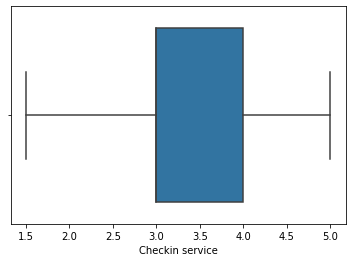

In [262]:
sns.boxplot(df['Checkin service'])

## Visualisasi Data dan Analisis

### Korelasi data

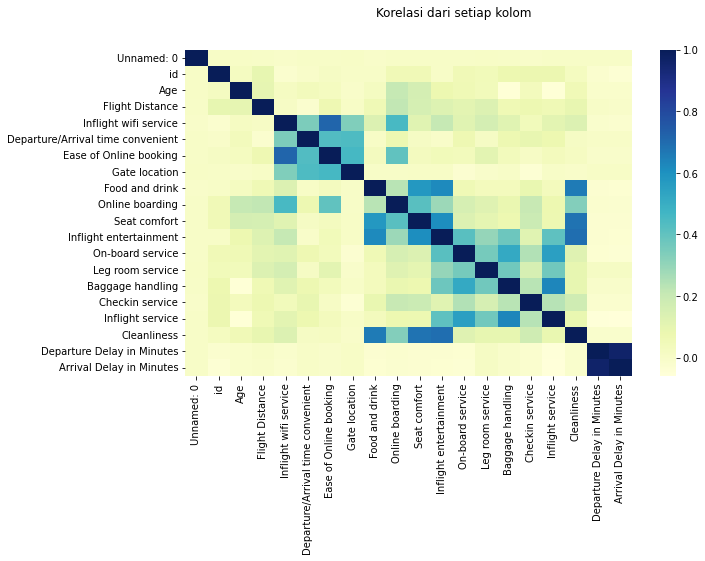

In [230]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), cmap = "YlGnBu")

# format graph
plt.suptitle("Korelasi dari setiap kolom ", fontsize = 12,)
plt.show()

### Satisfaction
Secara keseluruhan, dataset ini memperlihatkan faktor-faktor yang dapat mempengaruhi kepuasan pelanggan terhadap layanan yang diberikan, untuk kepuasan sendiri para pelanggan memberi nilai keseluruhan untuk menilai apakah layanan nya **satisfied** dan **Neutral or Disatisfied**. Artinya dari keseluruhan dataset ini kita bisa melihat terlebih dahulu porsi dari setiap nilai kepuasan pelanggan ini

In [181]:
def pivot_satisfaction (df, target): 
    
    df_pivot = pd.pivot_table(
        df[["id", target, "satisfaction"]],
        index = [target], 
        columns = ["satisfaction"], 
        aggfunc = "count", 
        fill_value =0).reset_index()
    
    df_pivot.columns = [target, "neutral or dissatisfied", "satisfied"]
    
    df_pivot["total"] = df_pivot["satisfied"]+df_pivot["neutral or dissatisfied"]
    df_pivot["dissatisfied_rate (%)"] = df_pivot["neutral or dissatisfied"]/df_pivot["total"]*100
    
    return df_pivot

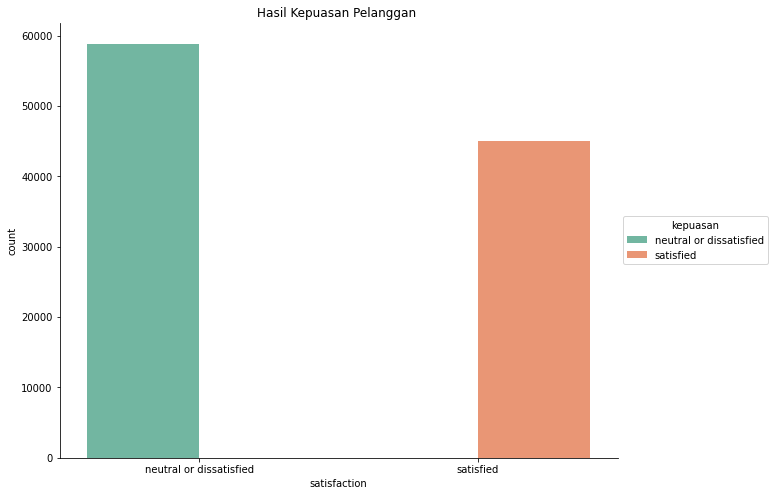

In [95]:
plt.figure(figsize = (10,8))
sns.countplot(x = "satisfaction", data = df, hue = 'satisfaction', palette = "Set2")

sns.despine(top = True, right = True, left = False, bottom = False )
plt.title("Hasil Kepuasan Pelanggan ")
plt.legend(loc = 'center left', bbox_to_anchor =(1,0.5), title = "kepuasan")
plt.show()

In [97]:
print(round((df[df['satisfaction'] == 'satisfied'].shape[0]/df.shape[0])*100,2))

43.33


dari hasil kolom `satisfaction` diatas dapat disimpulkan hanya 43.33% saja penumpang yang memberikan penilaian **satisfied** terhadap layanan yang disediakan maskapai penerbangan, sisanya sebanyak 56.67% memberikan penilaian **neutral or disatisfied**

### Gender

In [172]:
print('pria:', round((df[df['Gender'] == 'Male'].shape[0]/df.shape[0])*100,2))
print('wanita:', round((df[df['Gender'] == 'Female'].shape[0]/df.shape[0])*100,2))
df['Gender'].value_counts()

pria: 49.25
wanita: 50.75


Female    52727
Male      51177
Name: Gender, dtype: int64

Pembagian Porsi `Gender` pada dataset ini bisa dibilang hampir seimbang dengan persentase porsi data pria sebanyak 49.25% sedangkan wanita 50.75%

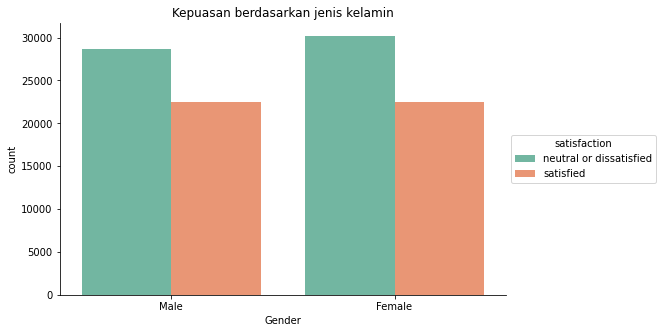

In [132]:
plt.figure(figsize = (8,5))
sns.countplot(x ="Gender", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan jenis kelamin")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [182]:
pivot_satisfaction(df, "Gender")

,Gender,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,Female,30193,22534,52727,57.262882
1,Male,28686,22491,51177,56.052524


Berdasarkan `Gender`, baik pria dan wanita lebih banyak memberikan penilaian **neutral or disatisfied**
- Persentase pria **neutral or disatisfied** : 57.26%
- Persentase wanita **neutral or disatisfied** :56.05%

### Customer type

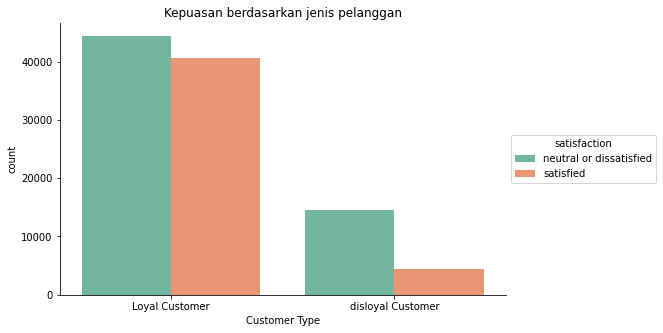

In [134]:
plt.figure(figsize = (8,5))
sns.countplot(x ="Customer Type", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan jenis pelanggan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [183]:
pivot_satisfaction(df, "Customer Type")

,Customer Type,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,Loyal Customer,44390,40533,84923,52.270881
1,disloyal Customer,14489,4492,18981,76.334229


Jika dilihat, pelanggan setia memiliki nilai **neutral or disatisfied** yang lebih tinggi dibandingkan nilai **satisfied** nya. Dapat diambil kesimpulkan bahwa: 
- pelayanan yang disediakan maskapai penerbangan tidak memenuhi keinginan dari para pelanggan atau mungkin juga terjadi perubahan pelayanan yang menyebabkan beberapa pelanggan loyal tidak puas dengan pelayanan yang diberikan
- pelanggan yang tidak loyal menunjukkan hal yang sama dimana lebih banyak dari mereka memberi penilaian **neutral or disatisfied**" alasannya bisa jadi karena layanan yang tidak sesuai dengan yg mereka inginkan.
- pelanggan loyal memiliki nilai *rate* **neutral or disatisfied** lebih rendah dibandingkan pelanggan yang tidak loyal mungkin karena beberapa dari mereka sudah sekian kali menggunakan maskapai penerbangan itu dan sudah terbiasa dengan pelayanan yang diberikan
- pelanggan yang tidak loyal memiliki nilai **neutral or disatisfied** sangat tinggi bisa jadi disebabkan juga karena *first impression* mereka yang tidak baik saat pertama kali mencoba maskapai tersebut

### Age

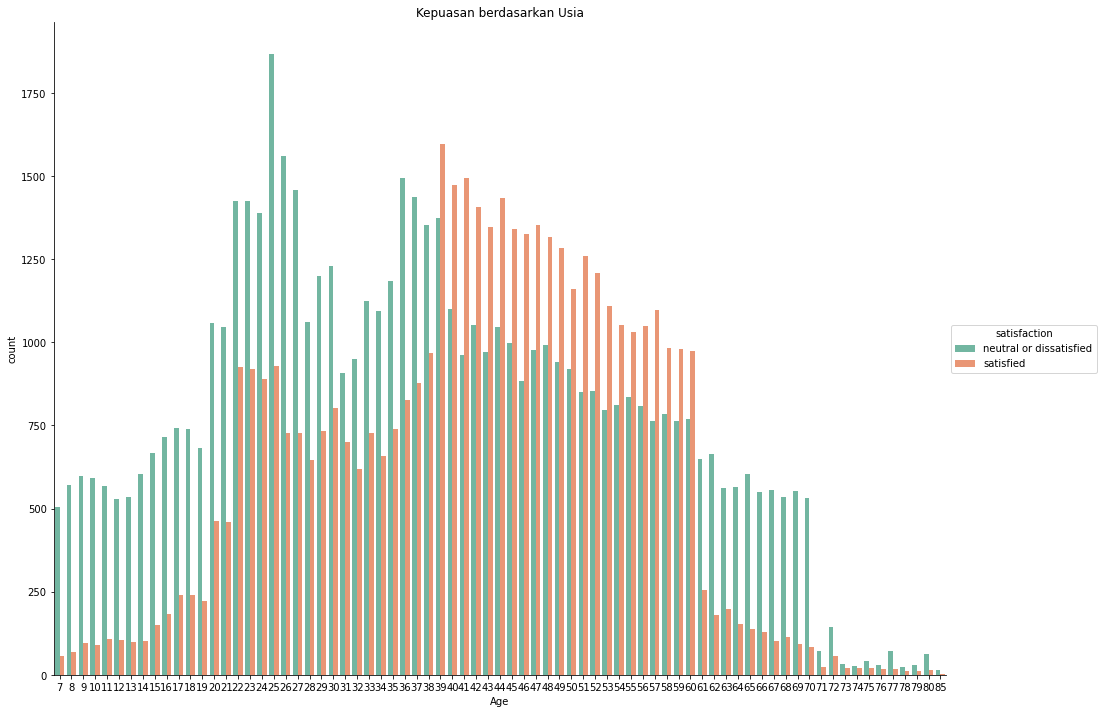

In [137]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Age", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan Usia")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [184]:
pivot_satisfaction(df, "Age")

,Age,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,7,506,56,562,90.035587
1,8,571,69,640,89.218750
2,9,597,95,692,86.271676
3,10,593,90,683,86.822840
4,11,569,109,678,83.923304
5,12,529,106,635,83.307087
6,13,535,98,633,84.518167
7,14,605,102,707,85.572843
8,15,668,150,818,81.662592
9,16,715,184,899,79.532814


In [179]:
def age_group (row): 
    if row <= 38 : 
        return "Umur 7-38"
    if (row >= 39) & (row <= 60): 
        return "Umur 39-60"
    if row >= 61:
        return "Umur 61-85"
    else:
        return "no age"
    
df["Age_group"] = df["Age"].apply(lambda row: age_group(row))

In [180]:
pivot_satisfaction(df, 'Age_group')

,Age_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Umur 39-60,20247,27264,47511,42.615394
1,Umur 61-85,6314,1662,7976,79.162487
2,Umur 7-38,32318,16099,48417,66.749282


Pada kolom `Age` dapat dilihat umur dari setiap penumpang, daftar umur ini bisa dibagi menjadi 3 kelompok
- kelompok umur 7-38 : pada rentang umur ini *rate* **neutral or disatisfied** lebih tinggi dibandingkan *rate* **satisfied**
- kelompok umur 39-60: pada rentang umur ini *rate* **satisfied** lebih tinggi dibandingkan *rate* **neutral or diatisfied**
- kelompok umur 61-85: pada rentang umut ini *rate* **neutral or disatisfied** kembali lebih tinggi dibandingkan *rate* **satisfied**



### Type of Travel

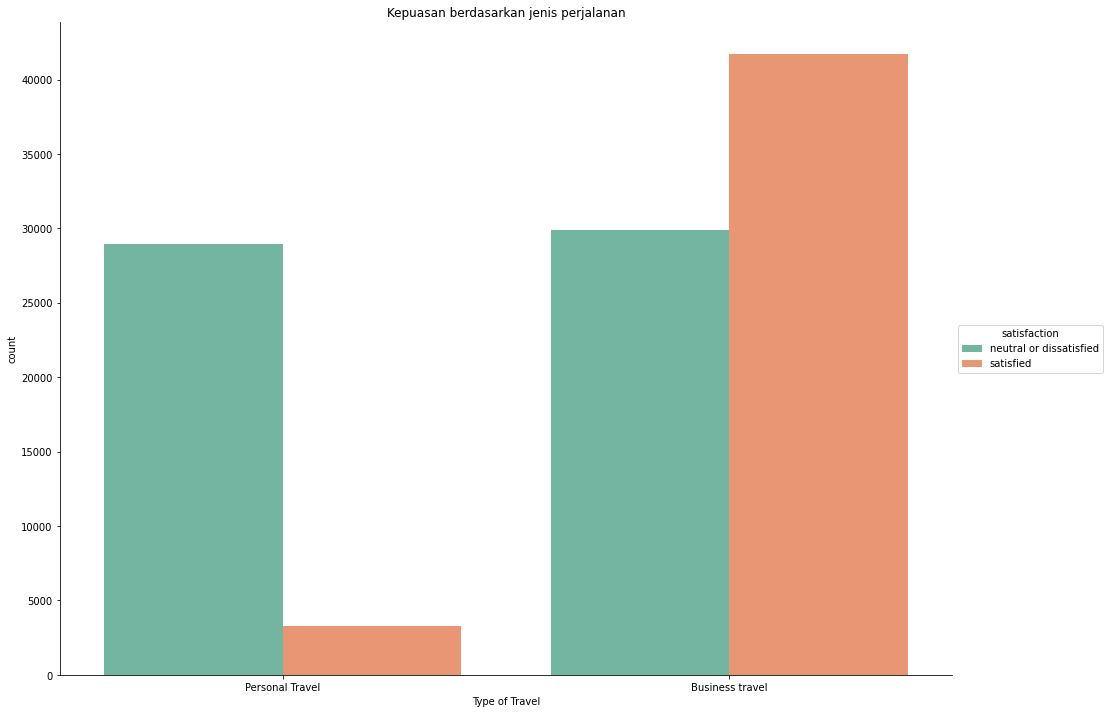

In [138]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Type of Travel", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan jenis perjalanan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [289]:
print('business: ',round((df[df['Type of Travel'] == 'Business travel'].shape[0]/df.shape[0])*100,2))
print('personal: ',round((df[df['Type of Travel'] == 'Personal Travel'].shape[0]/df.shape[0])*100,2))

df['Type of Travel'].value_counts()

business:  68.96
personal:  31.04


Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [185]:
pivot_satisfaction(df, 'Type of Travel')

,Type of Travel,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,Business travel,29909,41746,71655,41.740283
1,Personal Travel,28970,3279,32249,89.832243


Berdasarkan `Type of Travel`, Business travel memiliki tingkat **neutral or disatisfied** yang lebih sedikit dibandingkan personal travel. Hal ini bisa disebabkan karena orang-orang yang menggunakan Business travel memang merupakan tuntutan pekerjaan dari perusaahan mereka untuk bertemu dengan client atau kepentingan lainnya sehingga jenis perjalanan ini memungkinkan mereka untuk berkunjung ke tempat-tempat baru yang belum pernah dikunjungi sebelumnya. karena kecenderungan mood nya yg bahagia membuat penilaian survey berdasarkan jenis perjalanannya ini membuat Business Travel memiliki *rate* **neutral or disatisfied** yang lebih rendah

### Class

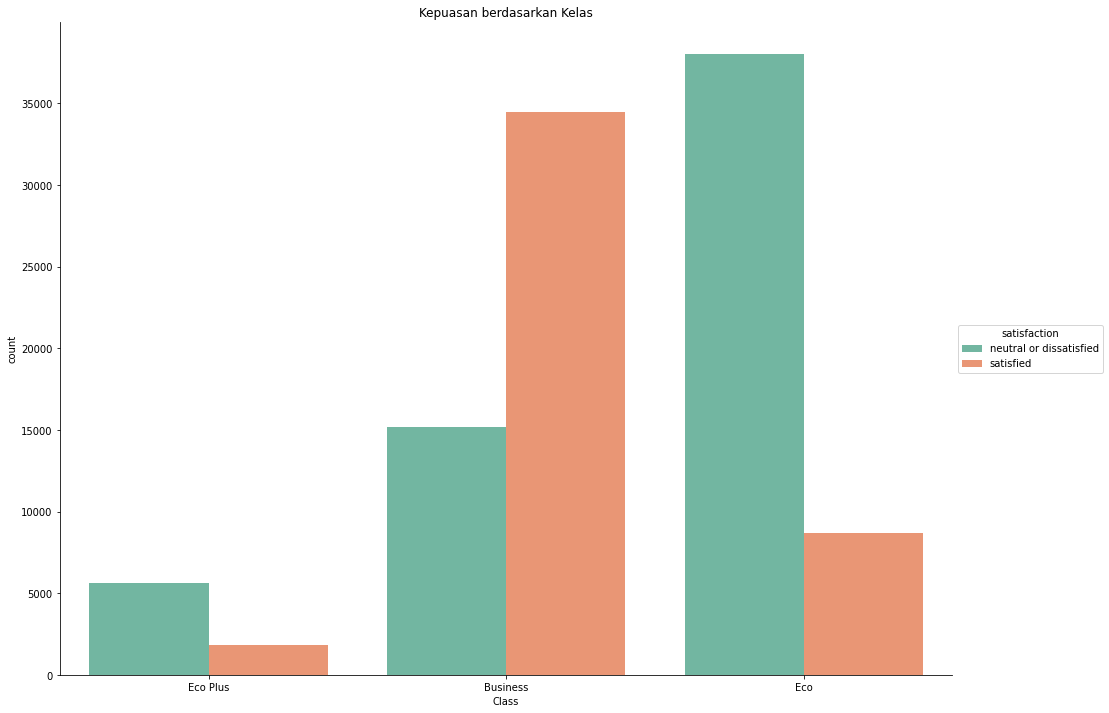

In [140]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Class", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan Kelas")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [186]:
pivot_satisfaction(df, 'Class')

,Class,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,Business,15185,34480,49665,30.574852
1,Eco,38044,8701,46745,81.386245
2,Eco Plus,5650,1844,7494,75.393648


Class Business memiliki *rate* **neutral or disatisfied** paling rendah yaitu sekitar 30.57%, mungkin ini terjadi karena pelayanan yang disediakan dari Class Business ini memiliki standar pelayanan yang lebih baik dibandingkan kelas Eco dan Eco Plus, hal ini seharusnya menjadi pertimbangan penting bagi maskapai penerbangan untuk lebih meningkatkan pelayanan di Class Eco dan Eco Plus

### Flight Distance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1152x864 with 0 Axes>

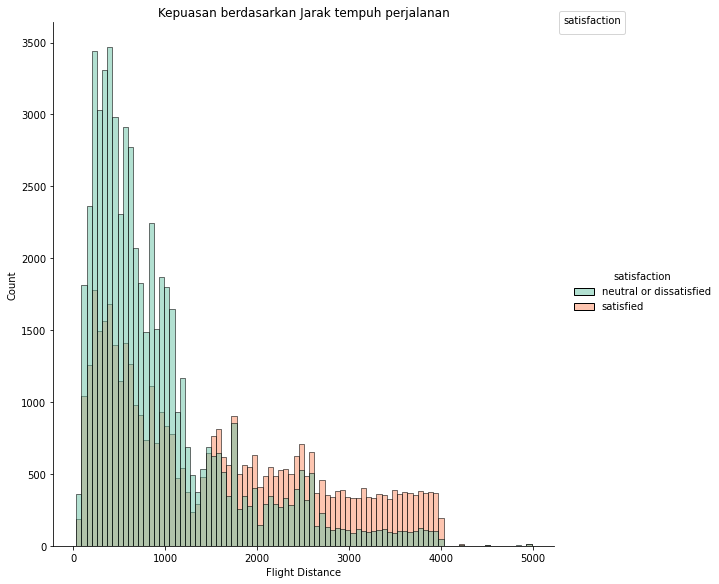

In [143]:
plt.figure(figsize = (16,12))
sns.displot(x ="Flight Distance", data = df, hue ="satisfaction",height=8, palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan Jarak tempuh perjalanan")
plt.legend(loc='center left', bbox_to_anchor=(1, 1),  title = "satisfaction")

plt.show()

In [192]:
def distance_group (row): 
    if row < 1500: 
        return "kurang dari 1500 km"
    else:
        return "lebih dari 1500 km"
    
df["distance_group"] = df["Flight Distance"].apply(lambda row: distance_group(row))

In [193]:
pivot_satisfaction(df, 'distance_group')

,distance_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,kurang dari 1500 km,48138,24256,72394,66.494461
1,lebih dari 1500 km,10741,20769,31510,34.087591


Pada dataset ini tidak disebutkan satuan jarak yang digunakan maka saya asumsikan jarak yang ada pada dalam dataset ini berada dalam satuan KM.

`Flight distance` mejadi salah satu faktor yang mempengaruhi kepuasan pelanggan, pada dataset ini jarak tempuh yang kurang dari 1500 km memiliki *rate* **neutral or disatisfied** lebih tinggi dibanding jarak tempuh yang lebih dari 1500 km. beberapa maskapai penerbangan memang menawarkan pelayanan yang berbeda terhadap perjalanan terbang dengan jarak tempuh yang pendek atau jarak tempuh yang panjang, perjalanan dengan jarak tempuh yang jauh biasanya menggunakan pesawat yang lebih luas sehingga ruang kabin lebih luas sehingga ini dapat mempengaruhi kepuasan pelanggan yang menempuh jarak pendek dengan pelanggan yang menempuh jarak panjang

[Perbedaan pesawat jarak tempuh jauh dan dekat](https://hot.liputan6.com/read/4554373/potret-6-perbedaan-pesawat-jarak-jauh-dan-dekat-jarang-diketahui-penumpang)

### Inflight wifi service

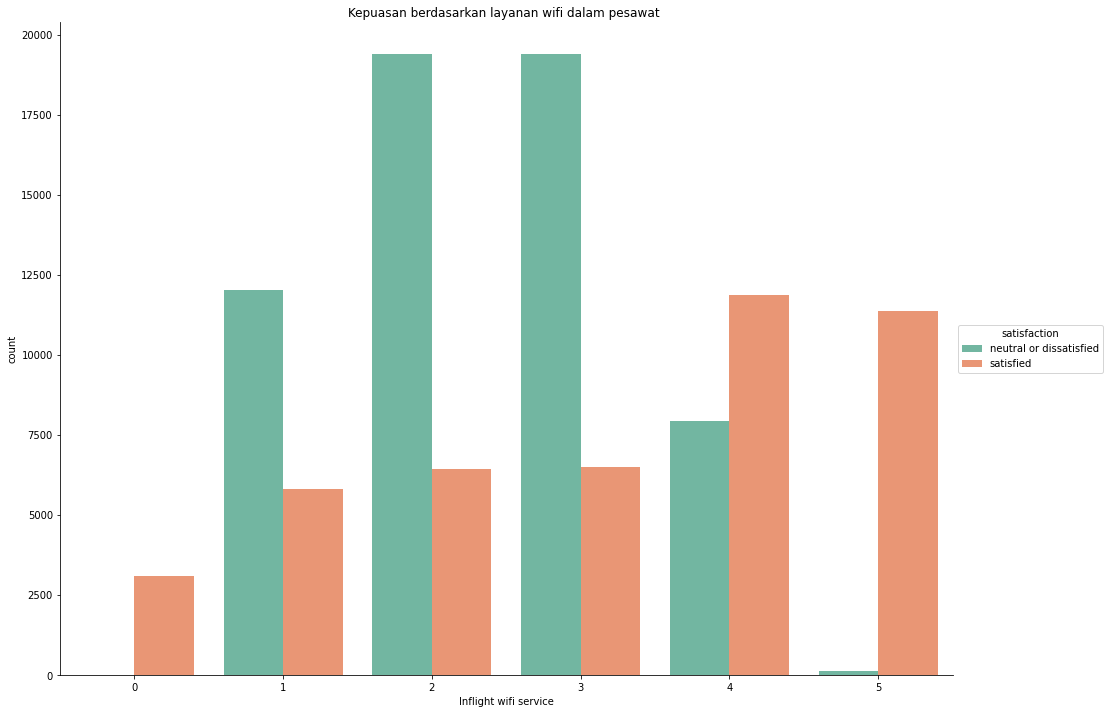

In [144]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Inflight wifi service", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan layanan wifi dalam pesawat ")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [194]:
pivot_satisfaction(df, 'Inflight wifi service')

,Inflight wifi service,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,8,3095,3103,0.257815
1,1,12034,5806,17840,67.455157
2,2,19407,6423,25830,75.133566
3,3,19386,6482,25868,74.942013
4,4,7938,11856,19794,40.103062
5,5,106,11363,11469,0.924231


Salah satu pelayanan di dalam pesawat adalah layanan wifi, pada layanan wifi ini nilai 1 sampai 3 memiliki *rate* **netral or disatisfied** diatas 60%: 
- nilai 1 = 67.45%
- nilai 2 = 75.13%
- nilai 3 = 74.94% 
Sedangkan nilai 4 dan 5 memiliki *rate* **neutral or disatisfied** lebih rendah, yaitu:
- nilai 4 = 40.10%
- nilai 5 = 0.92%


### Departure/Arrival time convenient

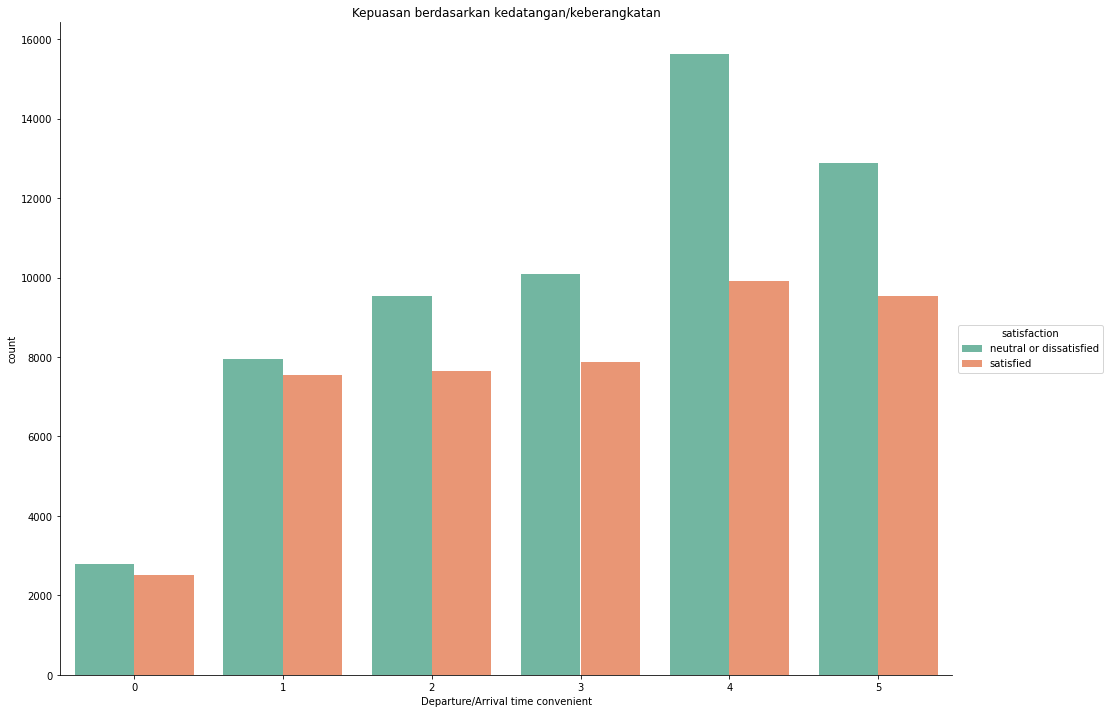

In [146]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Departure/Arrival time convenient", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan kedatangan/keberangkatan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [195]:
pivot_satisfaction(df, 'Departure/Arrival time convenient')

,Departure/Arrival time convenient,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,2780,2520,5300,52.452830
1,1,7957,7541,15498,51.342109
2,2,9534,7657,17191,55.459252
3,3,10093,7873,17966,56.178337
4,4,15640,9906,25546,61.222892
5,5,12875,9528,22403,57.469982


Nilai pada kolom `Departure/Arrival time convenient` dari 1-5 semuanya memiliki *rate* **neutral or disatisfied** diatas 50% 

### Ease of Online booking

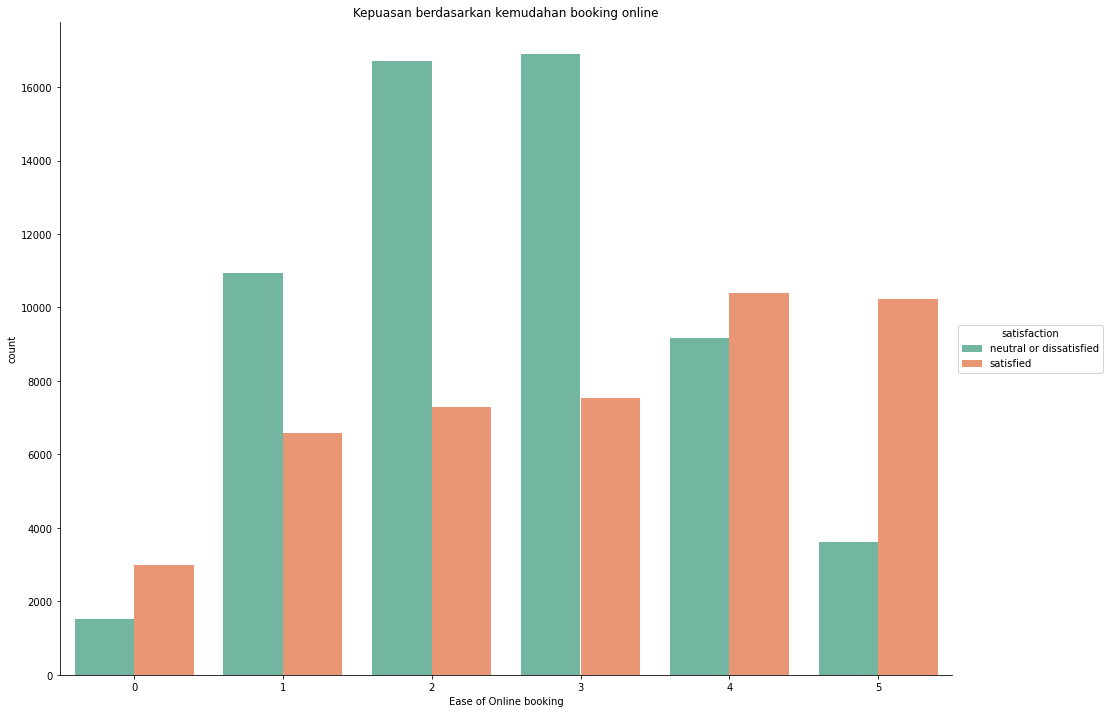

In [147]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Ease of Online booking", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan kemudahan booking online")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [197]:
pivot_satisfaction(df, 'Ease of Online booking')

,Ease of Online booking,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,1507,2980,4487,33.585915
1,1,10935,6590,17525,62.396576
2,2,16720,7301,24021,69.605762
3,3,16912,7537,24449,69.172563
4,4,9180,10391,19571,46.906137
5,5,3625,10226,13851,26.171396


Hasil survei variabel `Ease of Online booking` menunjukkan hasil yang mirip seperti di variabel `Inflight wifi service` dimana nilai 1-3 memiliki *rate* **neutral or disatisfied** diatas 60% dan nilai 4-5 memiliki *rate* **neutral or disatisfied** dibawah 50%

### Gate location

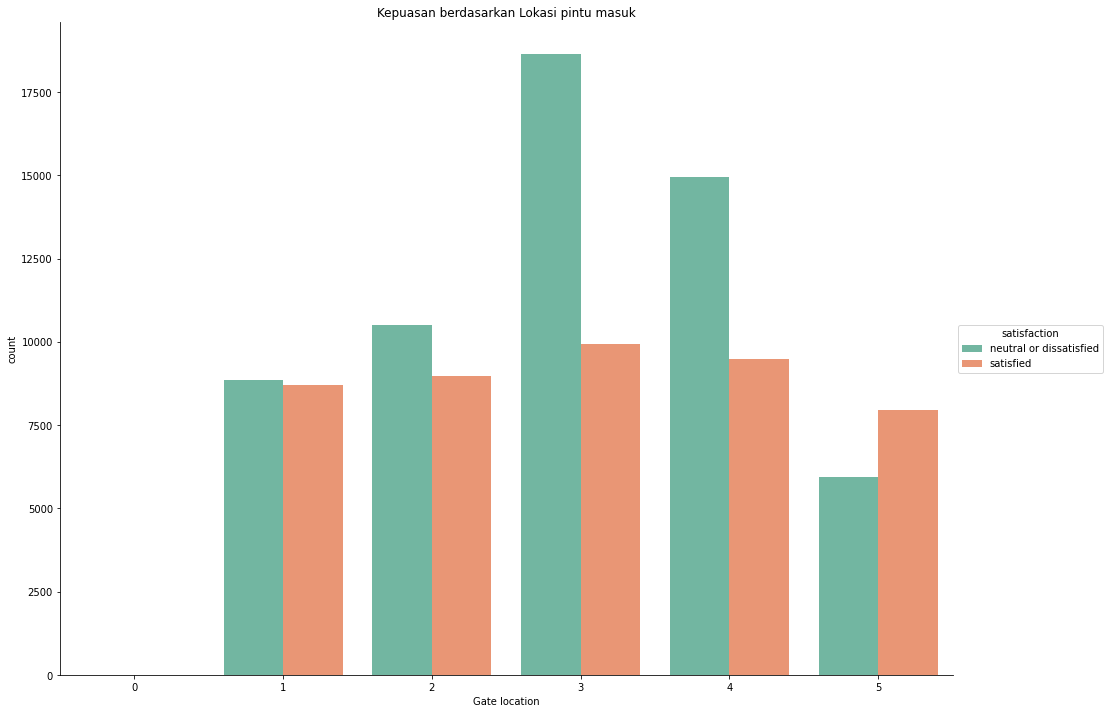

In [148]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Gate location", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan Lokasi pintu masuk")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [198]:
pivot_satisfaction(df, 'Gate location')

,Gate location,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,0,1,1,0.000000
1,1,8859,8703,17562,50.444141
2,2,10494,8965,19459,53.928773
3,3,18655,9922,28577,65.279770
4,4,14936,9490,24426,61.147957
5,5,5935,7944,13879,42.762447


Lokasi gerbang tidak berpengaruh banyak terhadap penilaian kepuasan secara kelesuruhan

### Food and drink

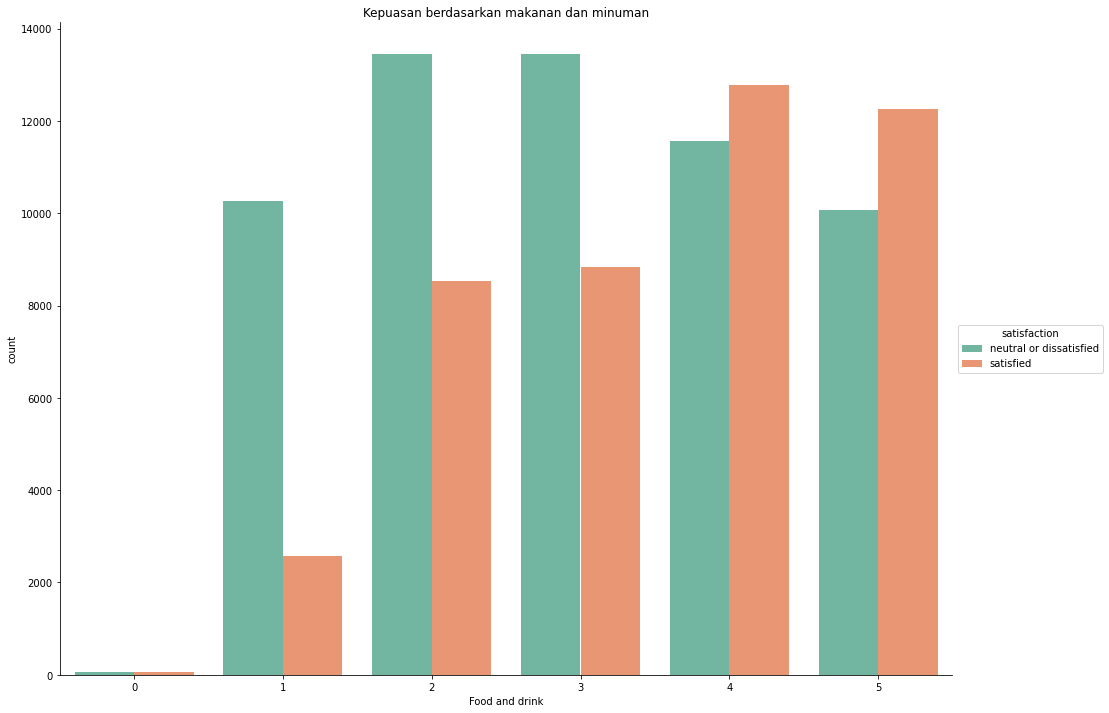

In [149]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Food and drink", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan makanan dan minuman")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [199]:
pivot_satisfaction(df, 'Food and drink')

,Food and drink,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,57,50,107,53.271028
1,1,10269,2568,12837,79.995326
2,2,13458,8530,21988,61.206112
3,3,13461,8839,22300,60.363229
4,4,11571,12788,24359,47.501950
5,5,10063,12250,22313,45.099269


Pada kolom `Food and drink`, nilai 1 memiliki *rate* **neutral or disatisfied** yang tinggi 

### Online boarding

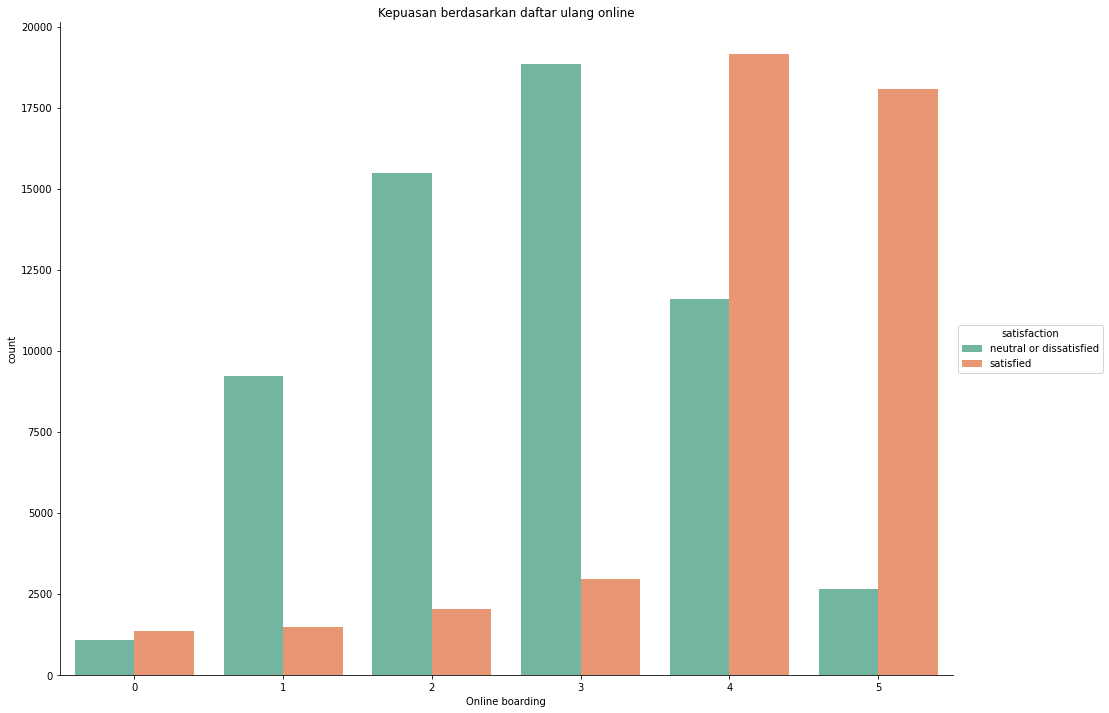

In [150]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Online boarding", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan daftar ulang online")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [200]:
pivot_satisfaction(df, 'Online boarding')

,Online boarding,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,1077,1351,2428,44.357496
1,1,9219,1473,10692,86.223345
2,2,15486,2019,17505,88.466153
3,3,18845,2959,21804,86.429096
4,4,11596,19166,30762,37.695859
5,5,2656,18057,20713,12.822865


In [217]:
personal = df[df["Type of Travel"]=="Personal Travel"]
Business = df[df["Type of Travel"]=="Business travel"]

In [213]:
pivot_satisfaction(personal, "Online boarding")

,Online boarding,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,850,486,1336,63.622754
1,1,4471,96,4567,97.897964
2,2,7275,124,7399,98.324098
3,3,8229,226,8455,97.327025
4,4,5728,1224,6952,82.393556
5,5,2417,1123,3540,68.276836


In [218]:
pivot_satisfaction(Business, "Online boarding")

,Online boarding,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,227,865,1092,20.787546
1,1,4748,1377,6125,77.518367
2,2,8211,1895,10106,81.248763
3,3,10616,2733,13349,79.526556
4,4,5868,17942,23810,24.645107
5,5,239,16934,17173,1.391720


Pada kolom `Online boarding` , *business taveler* memberikan nilai yang rendah untuk *rate* **neutral or disatisfied** berarti mereka memberikan nilai 5 jika pelayanan `Online boarding` nya bagus

### Seat comfort

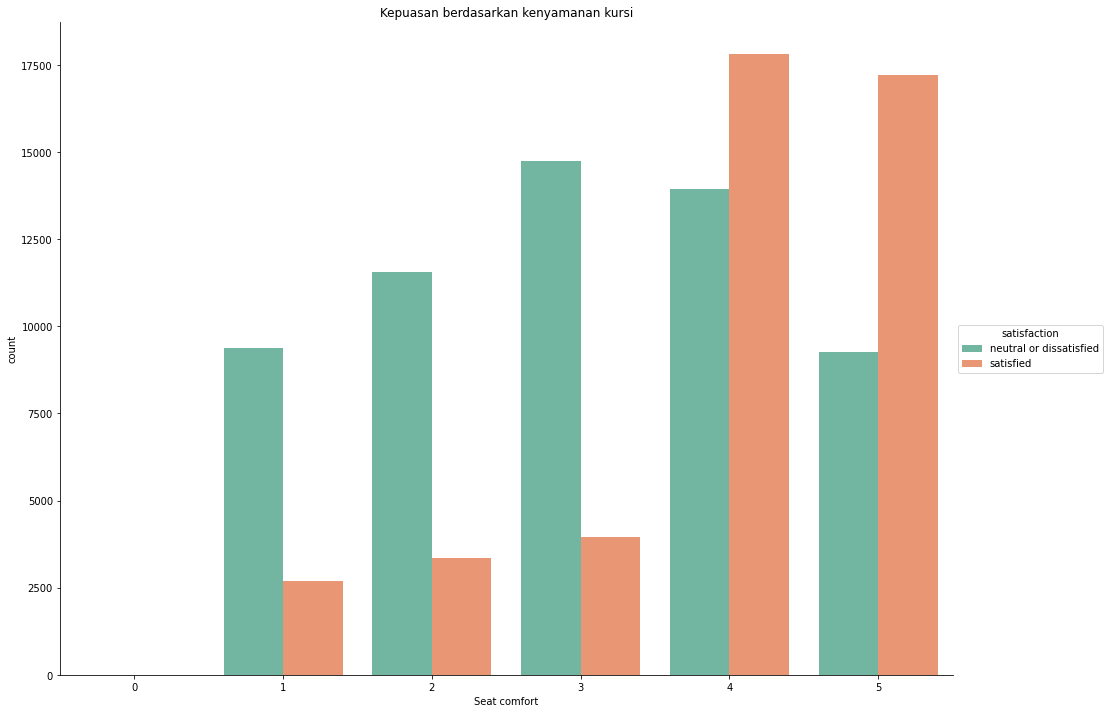

In [152]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Seat comfort", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan kenyamanan kursi")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [201]:
pivot_satisfaction(df, 'Seat comfort')

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,1,0,1,100.000000
1,1,9380,2695,12075,77.681159
2,2,11558,3339,14897,77.586091
3,3,14741,3955,18696,78.845742
4,4,13940,17825,31765,43.884779
5,5,9259,17211,26470,34.979222


In [219]:
pivot_satisfaction(personal,'Seat comfort')

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,1,4648,518,5166,89.972900
1,2,5025,577,5602,89.700107
2,3,5736,598,6334,90.558889
3,4,7210,868,8078,89.254766
4,5,6351,718,7069,89.842976


In [220]:
pivot_satisfaction(Business,'Seat comfort')

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,1,0,1,100.000000
1,1,4732,2177,6909,68.490375
2,2,6533,2762,9295,70.285100
3,3,9005,3357,12362,72.844200
4,4,6730,16957,23687,28.412209
5,5,2908,16493,19401,14.988918


`Seat comfort` cukup mempunyai pengaruh terhadap keseluruhan kepuasan pelanggan, terutama pada *business traveller*

### Inflight entertainment

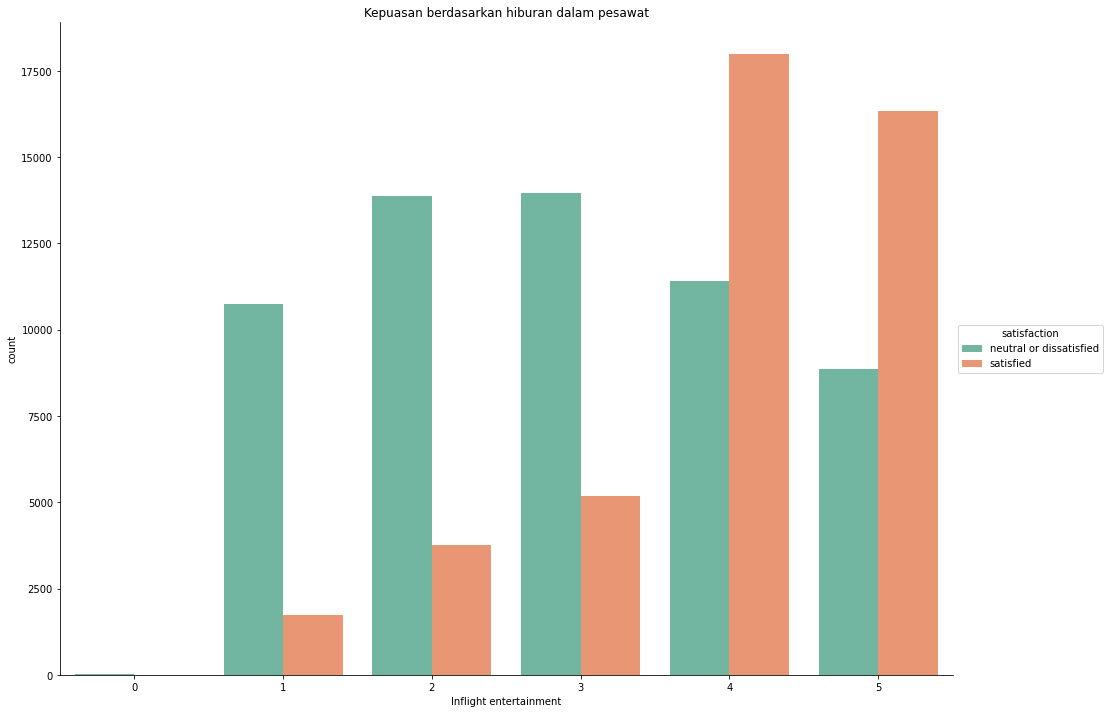

In [153]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Inflight entertainment", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan hiburan penerbangan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [202]:
pivot_satisfaction(df, 'Inflight entertainment')

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,14,0,14,100.000000
1,1,10733,1745,12478,86.015387
2,2,13875,3762,17637,78.669842
3,3,13970,5169,19139,72.992319
4,4,11423,18000,29423,38.823369
5,5,8864,16349,25213,35.156467


In [221]:
pivot_satisfaction(personal, 'Inflight entertainment')

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,1,4991,589,5580,89.444444
1,2,5926,672,6598,89.815095
2,3,6109,679,6788,89.997054
3,4,6068,686,6754,89.843056
4,5,5876,653,6529,89.998468


In [222]:
pivot_satisfaction(Business, 'Inflight entertainment')

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,14,0,14,100.000000
1,1,5742,1156,6898,83.241519
2,2,7949,3090,11039,72.008334
3,3,7861,4490,12351,63.646668
4,4,5355,17314,22669,23.622568
5,5,2988,15696,18684,15.992293


Pada kolom `Inflight entertainment` *personal traveller* dan *business traveller* memberikan penilaian yang sama seperti pada kolom `Seat comfort` 

### On-board service

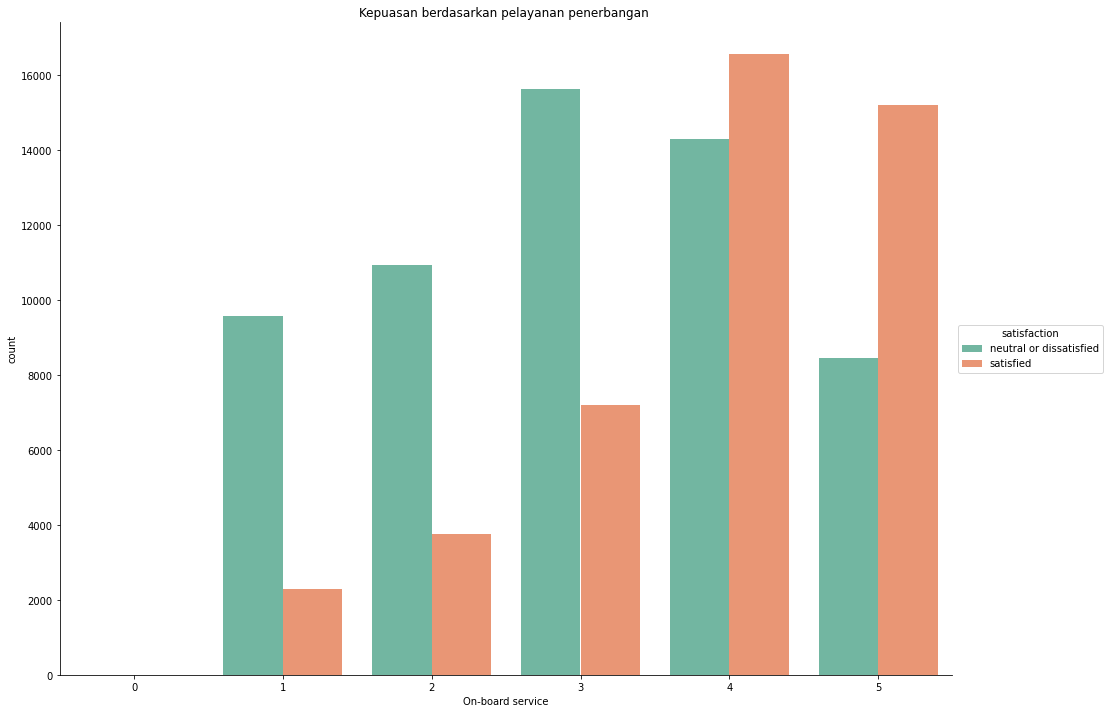

In [154]:
plt.figure(figsize = (16,12))
sns.countplot(x ="On-board service", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan pelayanan penerbangan ")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [203]:
pivot_satisfaction(df, 'On-board service')

,On-board service,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,3,0,3,100.000000
1,1,9572,2300,11872,80.626685
2,2,10927,3754,14681,74.429535
3,3,15625,7208,22833,68.431656
4,4,14296,16571,30867,46.314835
5,5,8456,15192,23648,35.757781


In [223]:
pivot_satisfaction(personal, 'On-board service')

,On-board service,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,1,3782,449,4231,89.387852
1,2,4077,436,4513,90.339021
2,3,7559,863,8422,89.753028
3,4,7492,870,8362,89.595790
4,5,6060,661,6721,90.165154


In [224]:
pivot_satisfaction(Business, 'On-board service')

,On-board service,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,3,0,3,100.000000
1,1,5790,1851,7641,75.775422
2,2,6850,3318,10168,67.368214
3,3,8066,6345,14411,55.971133
4,4,6804,15701,22505,30.233281
5,5,2396,14531,16927,14.154900


Kolom `Seat comfort` , `Inflight entertainment`, dan `On-board service` memiliki penilaian hampir sama dari *personal traveller* ataupun *Business traveller*, ketika mereka merasakan pelayanan yang baik maka mereka akan memberikan penilaian yang baik pula terhadap tingkat kepuasannya

### Leg room service

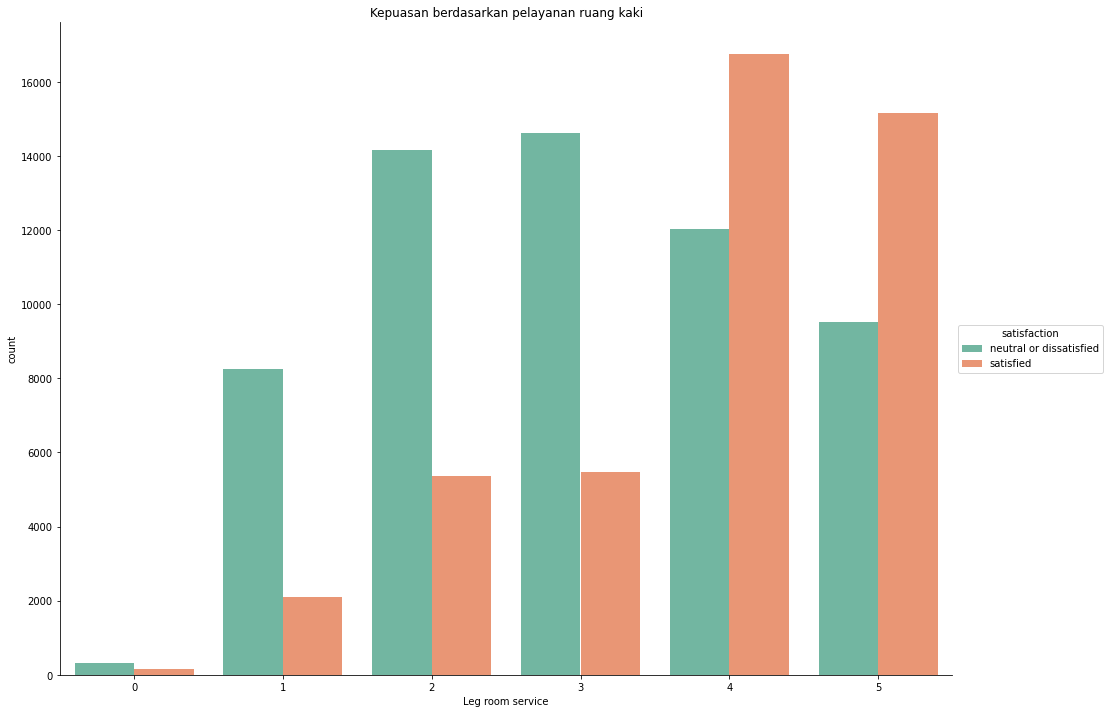

In [155]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Leg room service", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan pelayanan ruang kaki")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [204]:
pivot_satisfaction(df, 'Leg room service')

,Leg room service,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,306,166,472,64.830508
1,1,8253,2100,10353,79.716024
2,2,14162,5363,19525,72.532650
3,3,14623,5475,20098,72.758483
4,4,12025,16764,28789,41.769426
5,5,9510,15157,24667,38.553533


penilaian `Seat comfort` dan `Leg room service` mirip, artinya jika pelayanan `Seat comfort` bagus maka penilaian `Leg room service` akan bagus juga 

### Baggage handling

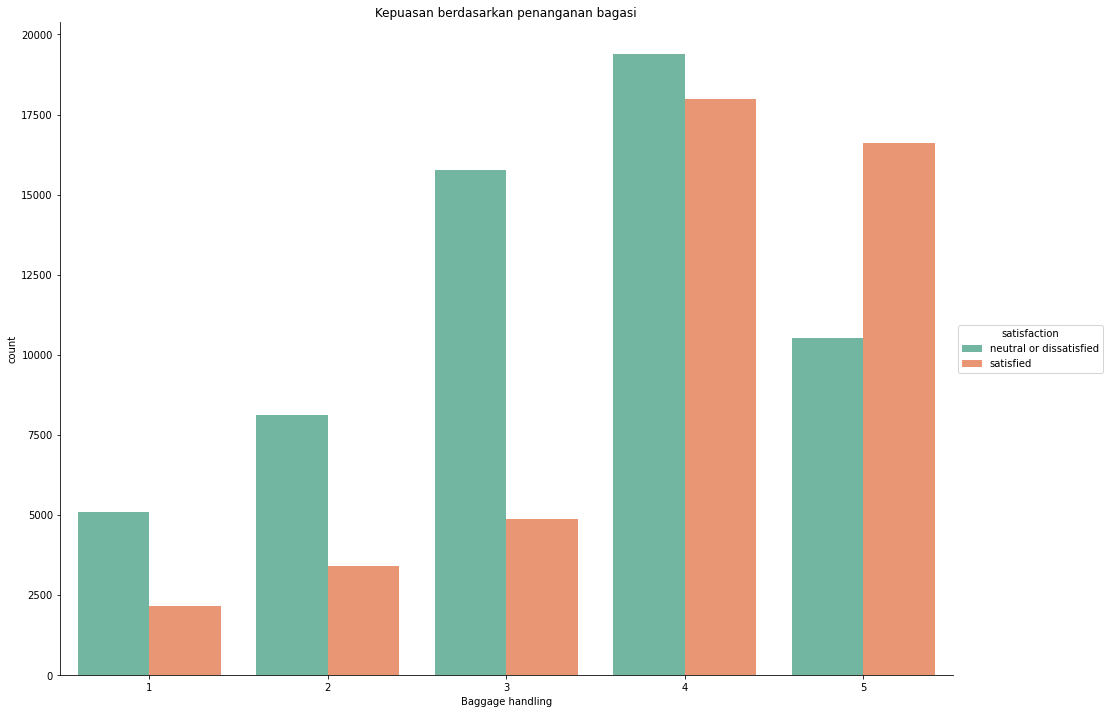

In [156]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Baggage handling", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan penanganan bagasi")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [205]:
pivot_satisfaction(df, 'Baggage handling')

,Baggage handling,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,1,5083,2154,7237,70.236286
1,2,8117,3404,11521,70.453954
2,3,15766,4866,20632,76.415277
3,4,19405,17978,37383,51.908622
4,5,10508,16623,27131,38.730603


### Chekin service

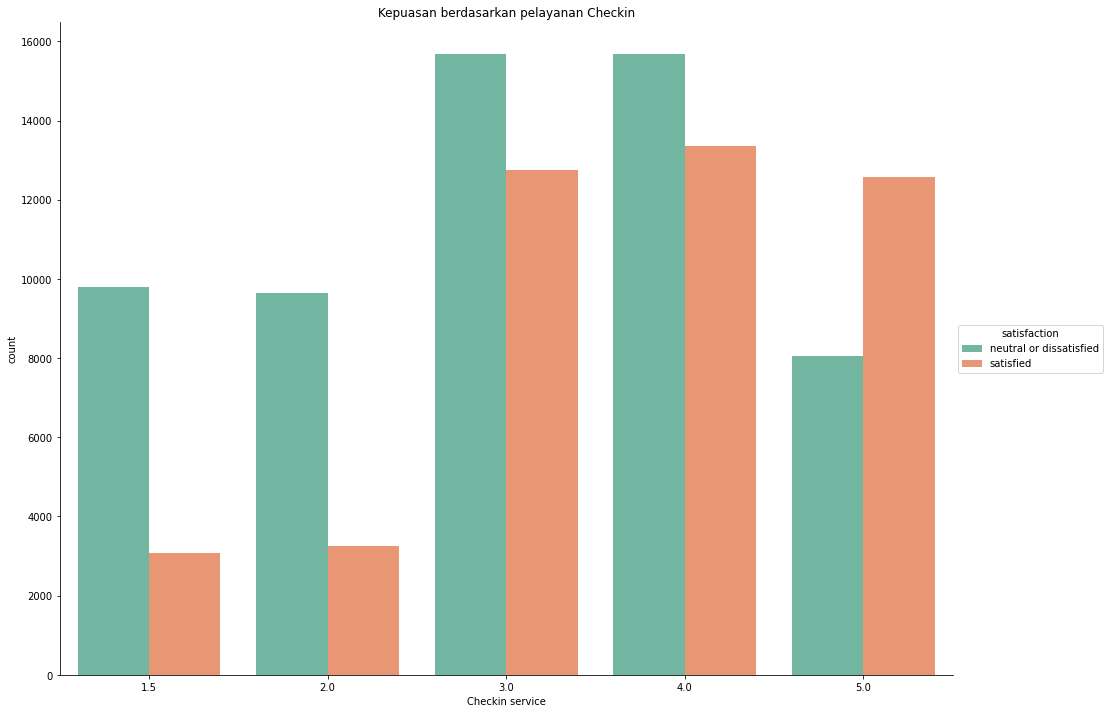

In [157]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Checkin service", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan pelayanan Checkin")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [206]:
pivot_satisfaction(df, 'Checkin service')

,Checkin service,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,1.5,9807,3084,12891,76.076332
1,2.0,9640,3253,12893,74.769255
2,3.0,15694,12752,28446,55.171202
3,4.0,15692,13363,29055,54.007916
4,5.0,8046,12573,20619,39.022261


### Inflight service

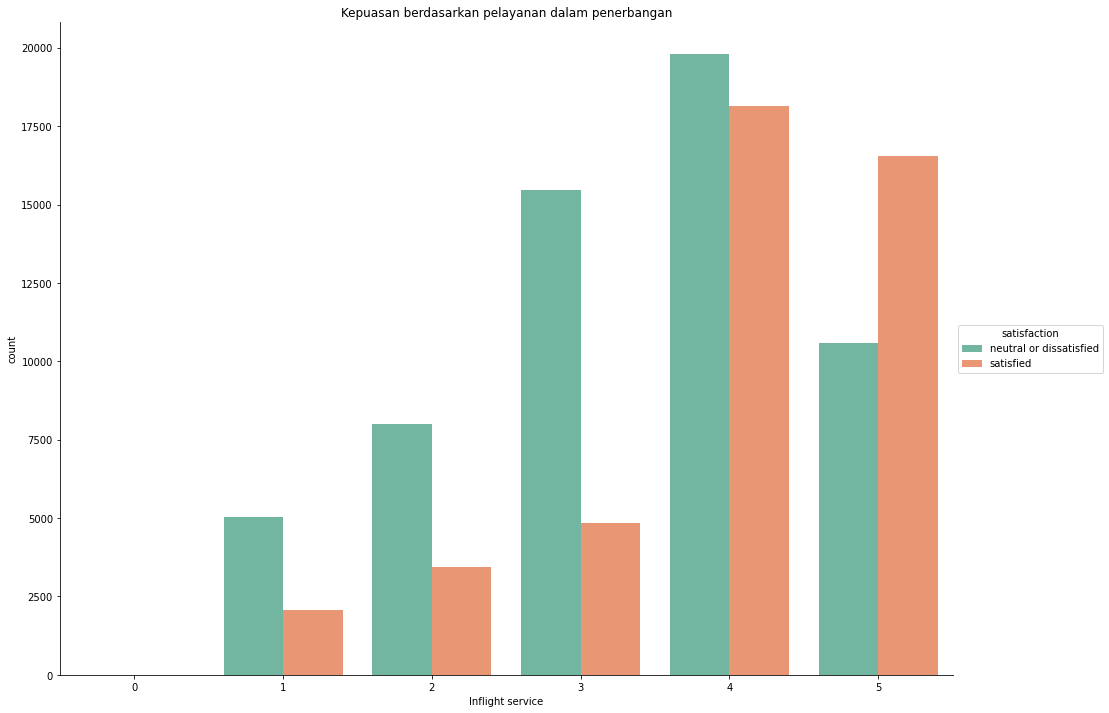

In [158]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Inflight service", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan pelayanan dalam penerbangan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [207]:
pivot_satisfaction(df, 'Inflight service')

,Inflight service,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,3,0,3,100.000000
1,1,5030,2054,7084,71.005082
2,2,8006,3451,11457,69.878677
3,3,15448,4851,20299,76.102271
4,4,19816,18129,37945,52.222954
5,5,10576,16540,27116,39.002803


### Cleanliness

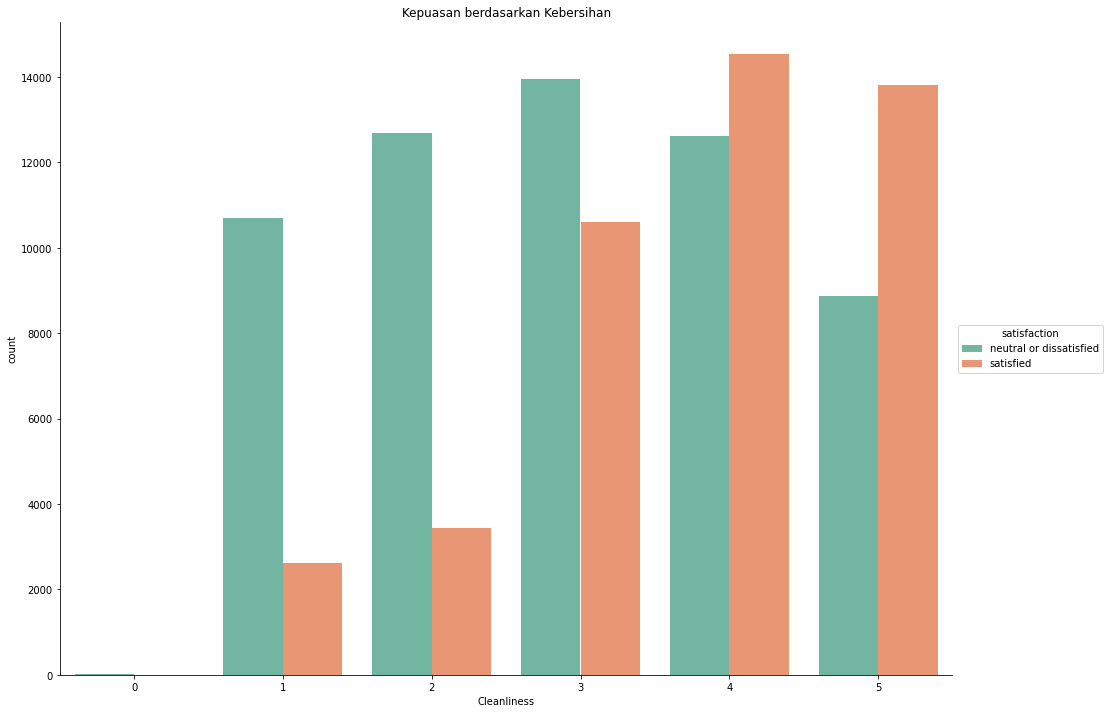

In [159]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Cleanliness", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan Kebersihan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [208]:
pivot_satisfaction(df, 'Cleanliness')

,Cleanliness,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,0,12,0,12,100.000000
1,1,10705,2613,13318,80.379937
2,2,12696,3436,16132,78.700719
3,3,13961,10613,24574,56.812078
4,4,12629,14550,27179,46.466022
5,5,8876,13813,22689,39.120279


dari mulai kolom `Seat comfort` hingga kolom `Cleanliness` memiliki penilaian yang mirip

### Departure Delay in Minutes

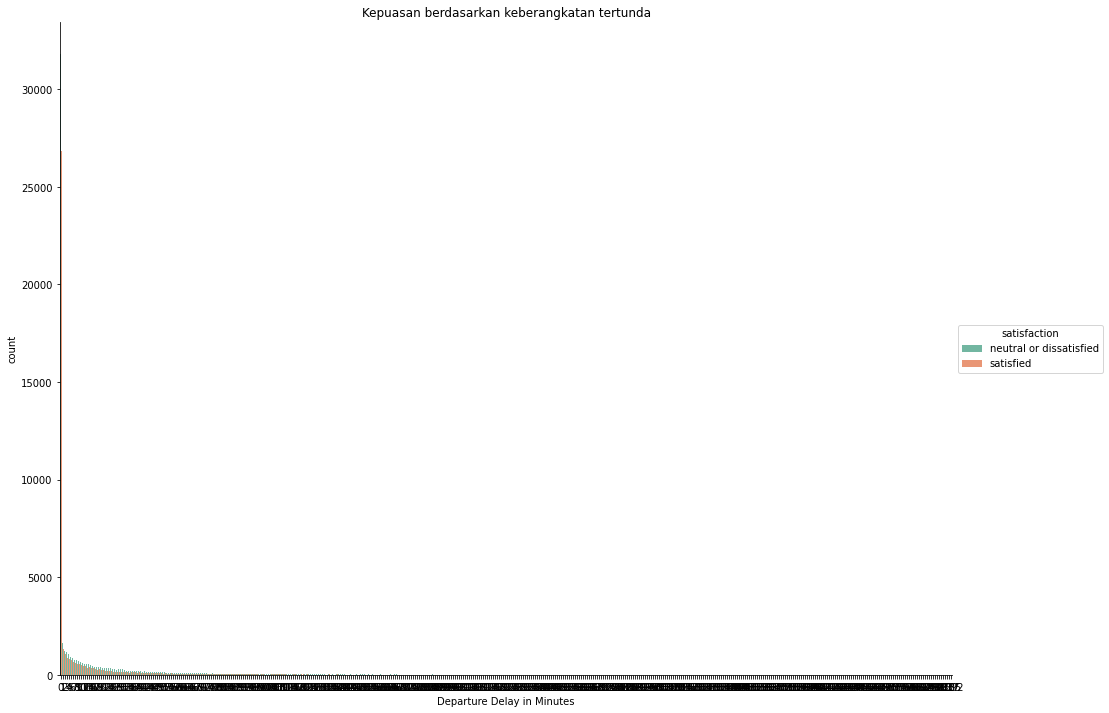

In [263]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Departure Delay in Minutes", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan keberangkatan tertunda")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [264]:
df["Departure Delay in Minutes"].describe()

count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

karena data sulit untuk dianalisis maka data perlu dibagi

In [265]:
df['Departure Delay in hour']= round(df['Departure Delay in Minutes']/60,1)

In [266]:
def scale_of_delay (row): 
    if row == 0: 
        return "on time"
    if (row > 0) & (row < 1): 
        return "less than hour"
    if (row >= 1) & (row < 12): 
        return "between 1 to 12 hours"
    if row >= 12:
        return "more than 12 hours"
    else:
        return "0"
    
df["scale_of_departure_delay"] = df["Departure Delay in hour"].apply(lambda row: scale_of_delay(row))

In [271]:
personal = df[df["Type of Travel"]=="Personal Travel"]
Business =df[df["Type of Travel"]=="Business travel"]

In [272]:
pivot_satisfaction(df,"scale_of_departure_delay").loc[[0,1,2,3],:]

,scale_of_departure_delay,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
0,between 1 to 12 hours,5040,2808,7848,64.220183
1,less than hour,18034,12109,30143,59.828152
2,more than 12 hours,9,5,14,64.285714
3,on time,35796,30103,65899,54.319489


In [273]:
pivot_satisfaction(Business,"scale_of_departure_delay").loc[[3,1,0, 2],:]

,scale_of_departure_delay,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
3,on time,17725,27633,45358,39.078002
1,less than hour,9409,11413,20822,45.187782
0,between 1 to 12 hours,2770,2695,5465,50.686185
2,more than 12 hours,5,5,10,50.000000


In [274]:
pivot_satisfaction(personal,"scale_of_departure_delay").loc[[3,1,0, 2],:]

,scale_of_departure_delay,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
3,on time,18071,2470,20541,87.975269
1,less than hour,8625,696,9321,92.532990
0,between 1 to 12 hours,2270,113,2383,95.258078
2,more than 12 hours,4,0,4,100.000000


Jika dianalisis, para *business traveller* masih bisa mentolerir penundaan keberangkatan walaupun itu lebih dari 12 jam, berbeda dengan *personal traveller* yang sangat tidak mentolerir penundaan keberangkatan 

### Arrival Delay in Minutes

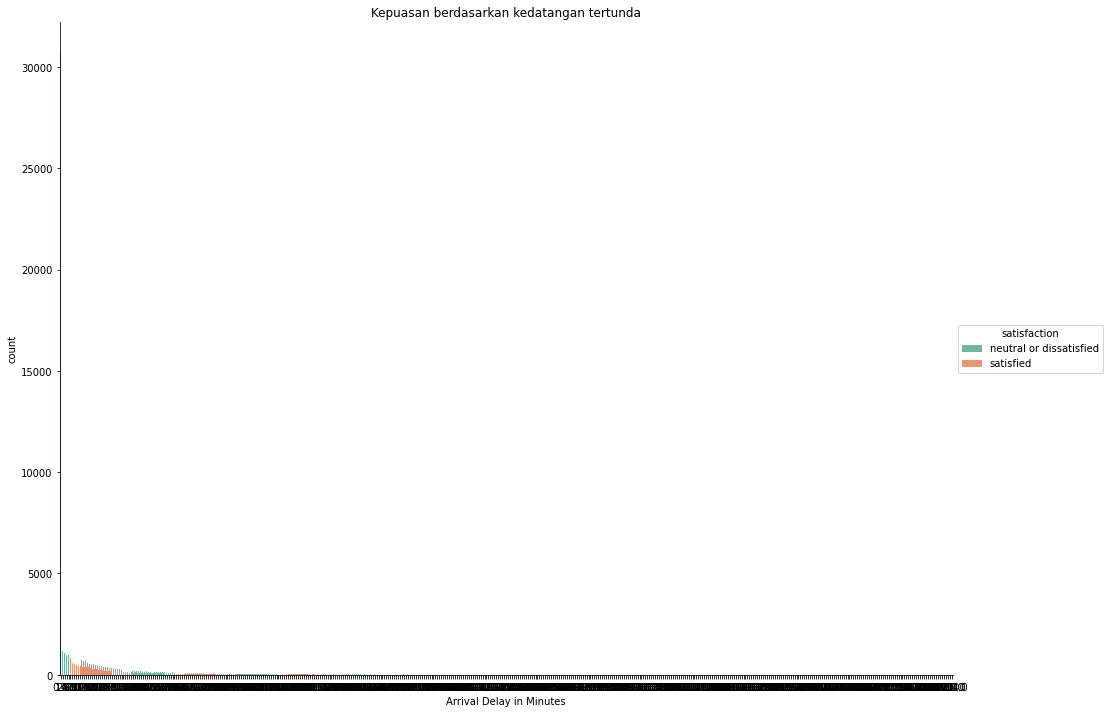

In [276]:
plt.figure(figsize = (16,12))
sns.countplot(x ="Arrival Delay in Minutes", data = df, hue ="satisfaction", palette ="Set2" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Kepuasan berdasarkan kedatangan tertunda")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()


In [277]:
df["Arrival Delay in hour"]= round(df["Arrival Delay in Minutes"]/60,1)

In [279]:
def scale_of_delay (row): 
    if row == 0: 
        return "on time"
    if (row > 0) & (row < 1): 
        return "less than hour"
    if (row >= 1) & (row < 12): 
        return "between 1 to 12 hours"
    if row >= 12:
        return "more than 12 hours"
    else:
        return "0"
    
df["scale_of_Arrival_delay"] = df["Arrival Delay in hour"].apply(lambda row: scale_of_delay(row))

In [280]:
pivot_satisfaction(df,"scale_of_Arrival_delay").loc[[3,1,0, 2],:]

,scale_of_Arrival_delay,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
3,more than 12 hours,7,5,12,58.333333
1,between 1 to 12 hours,5113,2835,7948,64.330649
0,0,182,128,310,58.709677
2,less than hour,19670,11578,31248,62.948029


In [284]:
personal = df[df["Type of Travel"]=="Personal Travel"]
Business =df[df["Type of Travel"]=="Business travel"]

In [283]:
pivot_satisfaction(personal,"scale_of_Arrival_delay").loc[[3,1,0, 2],:]

,scale_of_Arrival_delay,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
3,more than 12 hours,2,0,2,100.000000
1,between 1 to 12 hours,2331,120,2451,95.104039
0,0,104,16,120,86.666667
2,less than hour,9021,507,9528,94.678841


In [285]:
pivot_satisfaction(Business,"scale_of_Arrival_delay").loc[[3,1,0, 2],:]

,scale_of_Arrival_delay,neutral or dissatisfied,satisfied,total,dissatisfied_rate (%)
3,more than 12 hours,5,5,10,50.000000
1,between 1 to 12 hours,2782,2715,5497,50.609423
0,0,78,112,190,41.052632
2,less than hour,10649,11071,21720,49.028545


Pada kolom `Arrival Delay in Minutes` juga sama, *business traveller* lebih bisa mentolerir penundaan dibandingkan dengan *personal traveller*

## Kesimpulan dan rekomendasi

dari hasil analisis yang telah dilakukan, kita bisa membuat kesimpulan tentang faktor apa saja yang mempengaruhi kepuasan pelanggan dan apa saja pelayanan yang bisa ditingkatkan dan dipertahankan pelayanannya:
- Secara keseluruhan, lebih banyak pelanggan yang memilih **neutral or disatisfied** daripada **satisfied**
- *personal traveller* yang paling banyak memilih **neutral or disatisfied** 
- penyebab *personal traveller* banyak yang memilih **neutral or disatisfied** karena pelayanan pada jenis perjalanan ini kurang memuaskan 
- umur para pelanggan juga dapat mempengaruhi penialian kepuasan, penilaian **neutral or disatisfied** lebih banyak didominasi oleh pelanggan yang berumur 7-38 tahun dan 61-85 tahun
- perbedaan jarak tempuh menyebabkan perbedaan penilaian kepuasan, pelanggan yang melakukan perjalanan kurang dari 1500 KM lebih banyak yang merasa tidak puas
- berbeda dengan pelanggan yang menempuh jarak perjalanan lebih dari 1500 km, mereka lebih banyak yang merasakan puas dengan keseluruhan pelayanan

**REKOMENDASI**
- peningkatan pelayanan sebaiknya dilakukan pada jenis pelanggan *personal traveller* walaupun mereka hanya mengisi 31.04% dari keseluruhan pelanggan
- pelayanan kepada pelanggan yang melakukan perjalanan kurang dari 1500 km perlu ditingkatkan karena perbedaan pelayanan ini terjadi di banyak faktor lainnya sehingga mempengaruhi keseluruhan penilaian kepuasan dari pelanggan
- peningkatan pelayanan untuk pelanggan yang berumur 7-38 tahun dan 61-85 tahun


